Load data from a CSV file into a pandas DataFrame and display basic information of the DataFrame:

In [136]:
import pandas as pd

df = pd.read_csv("car_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13799 non-null  object 
 1   Price                13799 non-null  object 
 2   Transmission         13799 non-null  object 
 3   Year                 13799 non-null  int64  
 4   Motor Strength (KW)  13799 non-null  float64
 5   Mileage              13799 non-null  object 
 6   Engine Capacity      13675 non-null  float64
 7   Manufacturer         13799 non-null  object 
 8   Model                13799 non-null  object 
 9   Fuel Type            13799 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


Display the first 1000 rows:

In [137]:
df.head(1000)

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
0,https://olx.ba/artikal/62227396,950 KM,Manuelni,1990,200.0,333.333km,1.1,Zastava,Zastava 128,Benzin
1,https://olx.ba/artikal/62204473,950 KM,Manuelni,2000,40.0,333.333km,1.0,Opel,Corsa,Benzin
2,https://olx.ba/artikal/61478194,900 KM,Manuelni,2002,62.0,230.000km,1.3,Hyundai,Accent,Benzin
3,https://olx.ba/artikal/62229580,750 KM,Manuelni,2000,0.0,0km,1.4,Renault,Clio,Benzin
4,https://olx.ba/artikal/62201533,950 KM,Manuelni,2001,59.0,250.000km,1.9,Fiat,Punto,Dizel
...,...,...,...,...,...,...,...,...,...,...
995,https://olx.ba/artikal/58183260,60.900 KM,Automatik,2016,185.0,210.369km,3.0,Mercedes-Benz,CLS 350,Dizel
996,https://olx.ba/artikal/62097196,121.480 KM,Automatik,2024,187.0,1km,3.3,Mazda,CX-60,Dizel
997,https://olx.ba/artikal/60546460,72.500 KM,Automatik,2019,143.0,143.000km,2.2,Mercedes-Benz,GLC 220,Dizel
998,https://olx.ba/artikal/62096083,129.580 KM,Automatik,2024,187.0,1km,3.3,Mazda,CX-60,Dizel


### PRICE

Apply the cleaning function to the 'Price' column:

In [138]:
def clean_price(price):
    price = price.replace('.', '')
    if(',' in price):
        price = price.split(',')[0]
    else:
        price = price.split(' ')[0]
    if(price.isnumeric()):
        return int(price)
    return None

df['Price'] = df['Price'].apply(clean_price)

Calculate and print minimum and maximum price:

In [139]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print("Minimum price:", min_price)
print("Maximum price:", max_price)

Minimum price: 1.0
Maximum price: 1111111111.0


Filter prices outside the range 400 to 1000000:

In [140]:
df = df[df['Price'] > 400]
df = df[df['Price'] < 1000000]

min_price = df['Price'].min()
max_price = df['Price'].max()

print("Minimum price:", min_price)
print("Maximum price:", max_price)

Minimum price: 499.0
Maximum price: 750000.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13753 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13753 non-null  object 
 1   Price                13753 non-null  float64
 2   Transmission         13753 non-null  object 
 3   Year                 13753 non-null  int64  
 4   Motor Strength (KW)  13753 non-null  float64
 5   Mileage              13753 non-null  object 
 6   Engine Capacity      13629 non-null  float64
 7   Manufacturer         13753 non-null  object 
 8   Model                13753 non-null  object 
 9   Fuel Type            13753 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.2+ MB


Drop rows with NaN values:

In [142]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13629 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13629 non-null  object 
 1   Price                13629 non-null  float64
 2   Transmission         13629 non-null  object 
 3   Year                 13629 non-null  int64  
 4   Motor Strength (KW)  13629 non-null  float64
 5   Mileage              13629 non-null  object 
 6   Engine Capacity      13629 non-null  float64
 7   Manufacturer         13629 non-null  object 
 8   Model                13629 non-null  object 
 9   Fuel Type            13629 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB


Price Histogram

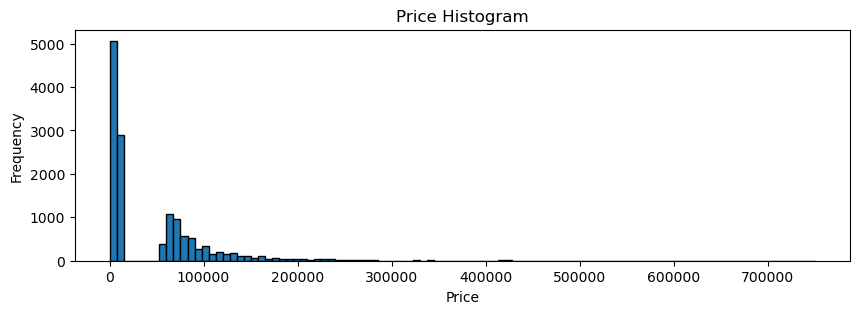

In [143]:
import matplotlib.pyplot as plt

price_counts = df['Price'].value_counts()

plt.figure(figsize=(10, 3))
plt.hist(df['Price'], bins=100, edgecolor='black')
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Log Price Histogram

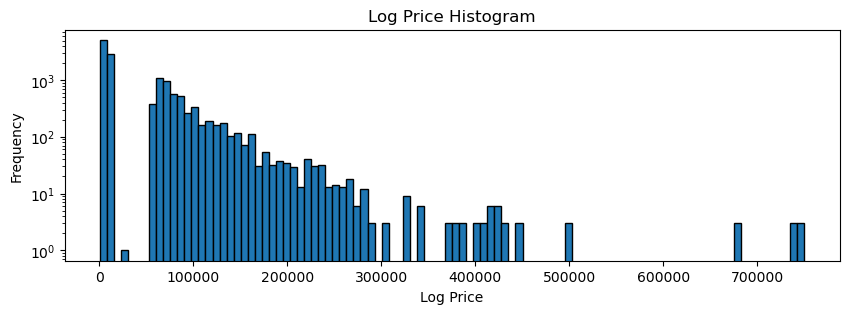

In [144]:
import matplotlib.pyplot as plt

price_counts = df['Price'].value_counts()

plt.figure(figsize=(10, 3))
plt.hist(df['Price'], bins=100, edgecolor='black', log=True)
plt.title('Log Price Histogram')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

### YEAR

Apply the cleaning function to the 'Year' column:

In [145]:
def clean_year(year):
    return int(year)

df['Year'] = df['Year'].apply(clean_year)

Calculate and print minimum and maximum year:

In [146]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print("Minimum year:", min_year)
print("Maximum year:", max_year)

Minimum year: 1954
Maximum year: 2024


Drop rows with NaN values:

In [147]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13629 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13629 non-null  object 
 1   Price                13629 non-null  float64
 2   Transmission         13629 non-null  object 
 3   Year                 13629 non-null  int64  
 4   Motor Strength (KW)  13629 non-null  float64
 5   Mileage              13629 non-null  object 
 6   Engine Capacity      13629 non-null  float64
 7   Manufacturer         13629 non-null  object 
 8   Model                13629 non-null  object 
 9   Fuel Type            13629 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB


Year Histogram

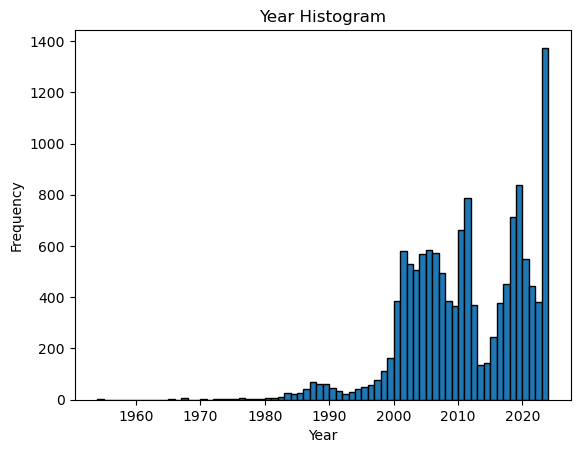

In [163]:
import matplotlib.pyplot as plt

plt.hist(df['Year'], bins=70, edgecolor='black')
plt.title('Year Histogram')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

### TRANSMISSION

Extract and print unique values in the 'Transmission' column:

In [149]:
transmissions_list = df['Transmission']

transmissions_set = set()

for el in transmissions_list:
    transmissions_set.add(el)

print(transmissions_set)

{'Manuelni', 'Automatik'}


Apply the cleaning function to the 'Transmission' column:

In [150]:

def clean_transmission(transmission):
    if(transmission == "Manuelni"):
        return 0
    elif(transmission == "Automatik"):
        return 1
    return None

df['Transmission'] = df['Transmission'].apply(clean_transmission)
print(df['Transmission'].head(30))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
13    0
14    0
16    0
17    1
18    0
19    0
20    0
21    0
22    0
28    0
29    0
30    0
31    0
32    0
37    0
38    0
39    0
40    0
Name: Transmission, dtype: int64


Drop rows with NaN values:

In [151]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13629 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13629 non-null  object 
 1   Price                13629 non-null  float64
 2   Transmission         13629 non-null  int64  
 3   Year                 13629 non-null  int64  
 4   Motor Strength (KW)  13629 non-null  float64
 5   Mileage              13629 non-null  object 
 6   Engine Capacity      13629 non-null  float64
 7   Manufacturer         13629 non-null  object 
 8   Model                13629 non-null  object 
 9   Fuel Type            13629 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


Transmission Pie Chart

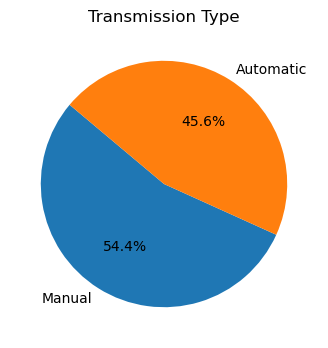

In [162]:
transmission_counts = df['Transmission'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(transmission_counts, labels=['Manual', 'Automatic'], autopct='%1.1f%%', startangle=140)
plt.title('Transmission Type')
plt.show()

### MOTOR STRENGTH (KW)

Calculate and print minimum and maximum motor strength (KW):

In [153]:
min_kw = df['Motor Strength (KW)'].min()
max_kw = df['Motor Strength (KW)'].max()

print("Minimum motor strength (KW):", min_kw)
print("Maximum motor strength (KW):", max_kw)

Minimum motor strength (KW): 0.0
Maximum motor strength (KW): 555555.0


Filter motor strength values outside the range 30 to 900:

In [154]:
df = df[df['Motor Strength (KW)'] > 30]
df = df[df['Motor Strength (KW)'] < 900]

min_kw = df['Motor Strength (KW)'].min()
max_kw = df['Motor Strength (KW)'].max()

print("Minimum motor strength (KW):", min_kw)
print("Maximum motor strength (KW):", max_kw)

Minimum motor strength (KW): 32.0
Maximum motor strength (KW): 757.0


Apply the cleaning function to the 'Motor Strength (KW)' column:

In [157]:
def clean_motor(power):
    return int(power)

df['Motor Strength (KW)'] = df['Motor Strength (KW)'].apply(clean_motor)
print(df['Motor Strength (KW)'].head(30))

0     200
1      40
2      62
4      59
5      44
6      81
7      40
8      55
9      66
10     44
12     33
13     40
14     72
16     44
17    116
18     74
20     37
21     40
22     60
29     85
30     55
31     44
32     40
37     63
38     70
39     55
40     88
41     44
42     45
43     35
Name: Motor Strength (KW), dtype: int64


Filter rows based on 'Motor Strength (KW)' values:

In [158]:
df = df[df['Motor Strength (KW)'] < 700]
df = df[df['Motor Strength (KW)'] > 30]

Drop rows with NaN values:

In [159]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13446 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13446 non-null  object 
 1   Price                13446 non-null  float64
 2   Transmission         13446 non-null  int64  
 3   Year                 13446 non-null  int64  
 4   Motor Strength (KW)  13446 non-null  int64  
 5   Mileage              13446 non-null  object 
 6   Engine Capacity      13446 non-null  float64
 7   Manufacturer         13446 non-null  object 
 8   Model                13446 non-null  object 
 9   Fuel Type            13446 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


Motor Strength (KW) Histogram:

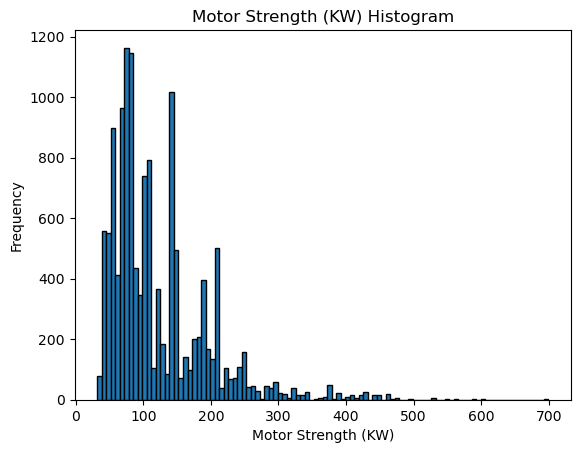

In [161]:
plt.hist(df['Motor Strength (KW)'], bins=100, edgecolor='black')
plt.title('Motor Strength (KW) Histogram')
plt.xlabel('Motor Strength (KW)')
plt.ylabel('Frequency')
plt.show()

### MILEAGE

Apply the cleaning function to the 'Mileage' column:

In [164]:
def clean_mileage(mileage):
    mileage = mileage.replace('.', '')
    if(',' in mileage):
        mileage = mileage.split(',')[0]
    else:
        mileage = mileage.split('km')[0]
    return int(mileage)

df['Mileage'] = df['Mileage'].apply(clean_mileage)

Calculate and print minimum and maximum mileage:

In [165]:
min_mileage = df['Mileage'].min()
max_mileage = df['Mileage'].max()

print("Minimum mileage:", min_mileage)
print("Maximum mileage:", max_mileage)

Minimum mileage: 0
Maximum mileage: 33333333333333


Filter mileage values greater than 1000000 and sort by mileage in descending order:

In [167]:
df = df[df['Mileage'] < 1000000]
df = df.sort_values(by='Mileage', ascending=False)
print(df['Mileage'].head(30))

2510     999999
3009     999999
4548     999888
2374     990000
7293     909090
2849     888000
6925     880000
71       875421
2094     800593
7994     800000
2557     780000
2703     700000
69       685549
5566     680000
4544     657951
11616    645000
2731     603000
6051     600000
5760     600000
8571     600000
2903     585600
11457    570000
11256    565000
3444     560000
8475     560000
98       555555
3529     552312
6092     550000
5982     550000
2685     550000
Name: Mileage, dtype: int64


Drop rows with NaN values:

In [168]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13320 entries, 2510 to 12354
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13320 non-null  object 
 1   Price                13320 non-null  float64
 2   Transmission         13320 non-null  int64  
 3   Year                 13320 non-null  int64  
 4   Motor Strength (KW)  13320 non-null  int64  
 5   Mileage              13320 non-null  int64  
 6   Engine Capacity      13320 non-null  float64
 7   Manufacturer         13320 non-null  object 
 8   Model                13320 non-null  object 
 9   Fuel Type            13320 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


Mileage Histogram

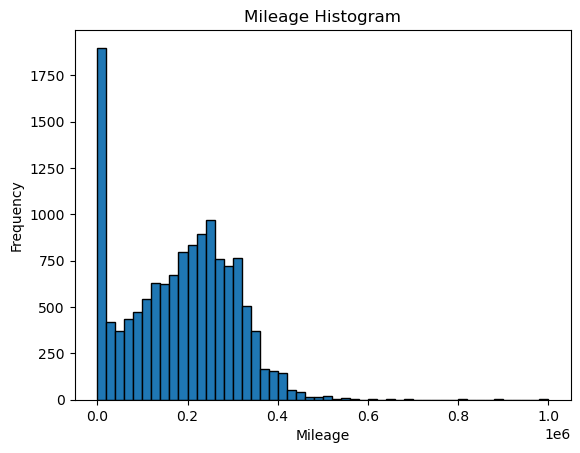

In [170]:
plt.hist(df['Mileage'], bins=50, edgecolor='black')
plt.title('Mileage Histogram')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

### ENGINE CAPACITY

Engine Capacity Histogram

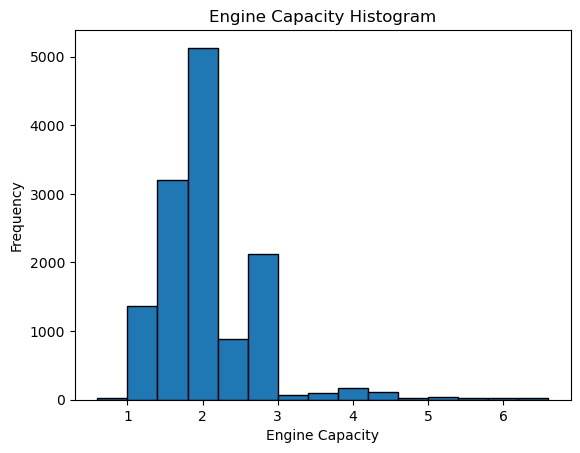

In [175]:
plt.hist(df['Engine Capacity'], bins=15, edgecolor='black')
plt.title('Engine Capacity Histogram')
plt.xlabel('Engine Capacity')
plt.ylabel('Frequency')
plt.show()

Drop rows with NaN values:

In [176]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13320 entries, 2510 to 12354
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13320 non-null  object 
 1   Price                13320 non-null  float64
 2   Transmission         13320 non-null  int64  
 3   Year                 13320 non-null  int64  
 4   Motor Strength (KW)  13320 non-null  int64  
 5   Mileage              13320 non-null  int64  
 6   Engine Capacity      13320 non-null  float64
 7   Manufacturer         13320 non-null  object 
 8   Model                13320 non-null  object 
 9   Fuel Type            13320 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


### CORRELATION MATRIX HEATMAP

Exclude the non-numeric columns and visualize the correlation matrix:

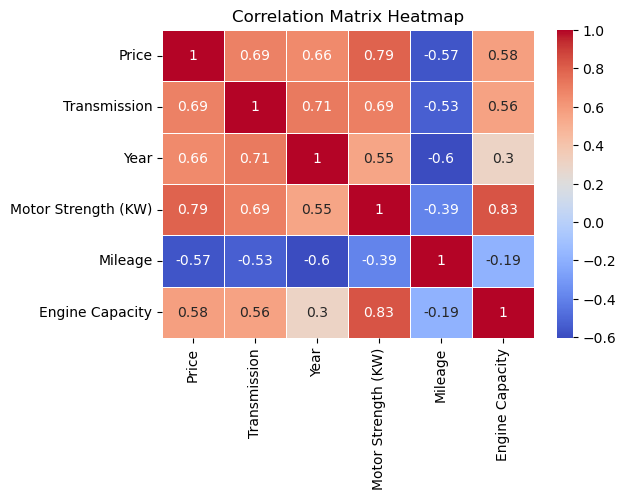

In [177]:
import seaborn as sns

non_numeric_columns=['URL', 'Manufacturer', 'Model', 'Fuel Type']
corr_columns = df.drop(columns=non_numeric_columns)
corr_matrix = corr_columns.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### OTHER

In [178]:
df = df.drop(columns=['URL'])

Display unique values in 'Fuel Type', 'Model', and 'Manufacturer' columns:

In [179]:
fuel_type_list = df['Fuel Type']
fuel_type_set = set()
for el in fuel_type_list:
    fuel_type_set.add(el)
print(fuel_type_set)

manufacturers_list = df['Manufacturer']
manufacturers_set = set()
for el in manufacturers_list:
    manufacturers_set.add(el)
print(manufacturers_set)

models_list = df['Model']
models_set = set()
for el in models_list:
    models_set.add(el)
print(models_set)

{'Hibrid', 'Dizel', 'Plin', 'Benzin'}
{'Volvo', 'Mercedes-Benz', 'Ford', 'Jaguar', 'Subaru', 'Mitsubishi', 'Mazda', 'Lincoln', 'DS automobiles', 'Suzuki', 'Bentley', 'Drugi', 'Volkswagen', 'Lada', 'Hyundai', 'BMW', 'Nissan', 'Hummer', 'Lamborghini', 'Chevrolet', 'Isuzu', 'Daewoo', 'Maserati', 'Ferrari', 'Jeep', 'Zastava', 'Smart', 'Saab', 'Cupra', 'Toyota', 'Peugeot', 'Chrysler', 'Citroen', 'Porsche', 'Alfa Romeo', 'Rover', 'Daihatsu', 'Chery', 'Honda', 'Dodge', 'Lancia', 'Wartburg', 'Dacia', 'Audi', 'Kia', 'Seat', 'MINI', 'Land Rover', 'Alpina', 'Škoda', 'Fiat', 'Ssangyong', 'Corvette', 'Lexus', 'Opel', 'Renault'}
{'R 5', 'Cargo', 'Octavia', 'T5 Kombi', '9-3', 'XC40', 'GLE 350', 'SLC 450', 'Cooper', 'Avensis', 'Bronco', 'Grand Scenic', 'Palio', 'Legacy', 'C 240', 'T4 Multivan', 'Trailblazer', 'Grande Punto', 'PT Cruiser', 'C 270', '316', 'Stilo', 'Discovery Sport', 'SQ8', 'X6 M', 'Cruze', 'NX 300', 'Ducato', 'S 280', 'Transit (Svi)', 'Swift', 'F 150', 'Karoq', 'Kona', 'Pajero', 'T1', 

Pie Chart: Fuel Type

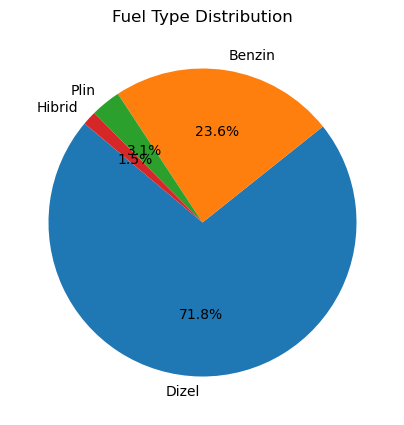

In [181]:
fuel_type_counts = df['Fuel Type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.show()

Pie Chart: Manufacturer

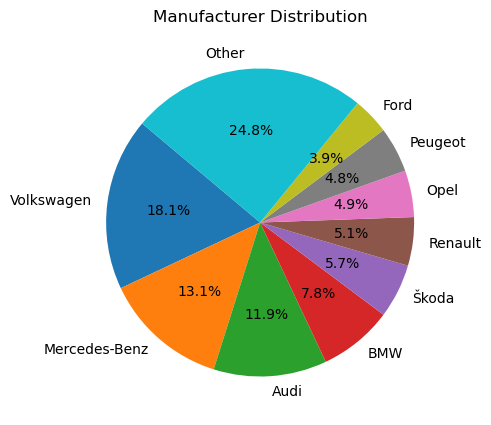

In [184]:
# Group smaller frequencies into 'Other' category for 'Manufacturer'
manufacturer_counts = df['Manufacturer'].value_counts()
threshold = 400 

# Create a new Series for the 'Other' category
other_manufacturer_count = pd.Series(manufacturer_counts[manufacturer_counts < threshold].sum(), index=['Other'])

# Filter out the small frequencies and add the 'Other' category
manufacturer_counts = pd.concat([manufacturer_counts[manufacturer_counts >= threshold], other_manufacturer_count])

plt.figure(figsize=(5, 5))
plt.pie(manufacturer_counts, labels=manufacturer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Manufacturer Distribution')
plt.show()

Filter and merge data based on 'Manufacturer' and 'Model':

In [185]:
grouped = df.groupby(['Manufacturer', 'Model']).size().reset_index(name='Count')
filtered = grouped[grouped['Count'] >= 10] # increase the number with a larger dataset
df = pd.merge(df, filtered[['Manufacturer', 'Model']], on=['Manufacturer', 'Model'], how='inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11819 entries, 0 to 11818
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                11819 non-null  float64
 1   Transmission         11819 non-null  int64  
 2   Year                 11819 non-null  int64  
 3   Motor Strength (KW)  11819 non-null  int64  
 4   Mileage              11819 non-null  int64  
 5   Engine Capacity      11819 non-null  float64
 6   Manufacturer         11819 non-null  object 
 7   Model                11819 non-null  object 
 8   Fuel Type            11819 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 831.2+ KB


Encode categorical columns (one-hot-encoding):

In [186]:
df_copy = df.copy()
df = pd.get_dummies(df, columns=['Model', 'Manufacturer', 'Fuel Type'])
print(df.shape)

# Concatenate the original and encoded dataframes
df = pd.concat([df, df_copy], axis=1, join='outer')
print(df.shape)

(11819, 269)
(11819, 278)


Remove duplicate columns:

In [187]:
df = df.loc[:, ~df.columns.duplicated()].copy()
print(df.shape)

(11819, 272)


Save the cleaned data to a new CSV file:

In [188]:
df.to_csv('cleaned_car_data.csv', index=False)
print("Data preprocessing completed.")

Data preprocessing completed.
